In [14]:
####################  Data Analysis & Calculation  #####################3
import numpy as np   
import pandas as pd  
import datetime  

####################  Visuvalization & plotting  #####################3
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline  
#################### Machine Learning #####################3
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import warnings  
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder 
import xgboost as xgb
from xgboost.sklearn import XGBClassifier # Extrame GB
from xgboost import plot_importance ## Plotting Importance Variables 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder # Labeling the columns with 0 & 1
from xgboost import XGBClassifier

In [15]:
# Read the data in
new = pd.read_csv(r"C:\Users\admin\Desktop\Machine Learning\Extreme Boosting\Problem 2\admission.csv")
new.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [16]:
print ("Rows     : " ,employee.shape[0])
print ("Columns  : " ,employee.shape[1])


Rows     :  500
Columns  :  9


In [17]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


### Missing Value

In [18]:
new.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## Removing Irrelavent Variable 

In [19]:
new = new.drop(['Serial No.'],axis=1)
new.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [20]:
new = new.rename(columns={'LOR ': 'LOR', 'Chance of Admit ': 'Chance_of_Admit'})

In [21]:
new.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [23]:
for i in new['Chance_of_Admit']:
    if i >= 0.80:
        new['Chance_of_Admit'].replace(i, 'High', inplace = True)
    else:
        new['Chance_of_Admit'].replace(i, 'Low', inplace = True)

In [24]:
# #Employee Numeric columns
Quantitative_Data = new[new.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Data.head(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1


In [25]:
Qualitative_Data = []

In [26]:
for i in new['Chance_of_Admit']:
    if i == 'High':
        Qualitative_Data.append(1)
    else:
        Qualitative_Data.append(0)

In [27]:
Qualitative_Data = pd.DataFrame(Qualitative_Data)

In [28]:
Qualitative_Data.rename(columns={0 : 'Chance_of_Admit'}, inplace=True)

In [29]:
Qualitative_Data.head()

,Chance_of_Admit
0,1
1,0
2,0
3,1
4,0


In [30]:
final_combined = pd.concat([Quantitative_Data, Qualitative_Data],axis=1)

final_combined.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


# Data Partition-1

In [34]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
X = final_combined.drop('Chance_of_Admit',axis=1)
y = final_combined[["Chance_of_Admit"]]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state =18756)

In [35]:
print('The number of samples into the Train data is {}.'.format(x_train.shape[0]))
print('The number of samples into the Test data is {}.'.format(x_test.shape[0]))

The number of samples into the Train data is 350.
The number of samples into the Test data is 150.


# Model -- Xg Boosting

In [36]:
# Define Model parameters to tune
# n_estimators=The number of boosting stages to perform.
model_parameters = {'n_estimators': [10, 15, 20, 30, 50], # number of tress
                    'max_depth':    [3, 5, 6],      # maximum branches in tree
                    'learning_rate':[0.8, 0.6],
                    'reg_lambda':[0,1]} #parent 

In [38]:
# Gridsearch the parameters to find the best parameters. Using L2 penalty
model = XGBClassifier()   # Lamda = 0 
gscv = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=5, 
                    verbose=1, 
                    n_jobs=-1,
                    scoring='accuracy')

gscv.fit(x_train, y_train)  ## Model building

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [39]:
print('The best parameter are -', gscv.best_params_)

The best parameter are - {'learning_rate': 0.6, 'max_depth': 6, 'n_estimators': 10, 'reg_lambda': 1}


In [40]:
# Re-fit the model with the best parameters
final_mod = XGBClassifier(**gscv.best_params_)
final_mod.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [41]:
parent_node = {'shape':'box',
               'style':'filled,rounded',
                'fillcolor' :'#78cbec'}
child_node = {'shape':'box',
               'style':'filled',
                'fillcolor' :'#e48038'}

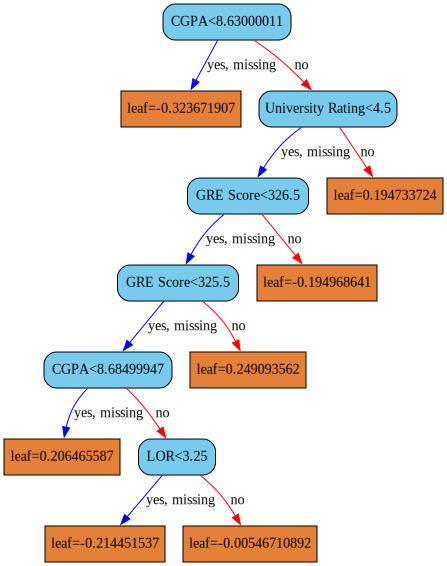

In [42]:
xgb.to_graphviz(final_mod,num_trees=9,size="5,5",   # Tree = 10 
               condition_node_params=parent_node,
               leaf_node_params=child_node)

Yhat = Initial Prediction + Learning rate * Average error0 + Learning rate * Average error2 + ... + Learning rate * Average error49 
yhat = 0.5               + 0.3           * -0.568063915   +        0.3    * -0.455574751    +  

# Accuracy of Train

In [43]:
train=pd.concat([x_train,y_train],axis=1)
train['Predicted']=final_mod.predict(x_train)  # MODEL = Final_mod
train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,Predicted
159,297,100,1,1.5,2.0,7.90,0,0,0
50,313,98,3,2.5,4.5,8.30,1,0,0
452,328,116,4,5.0,3.5,9.60,1,1,1
494,301,99,3,2.5,2.0,8.45,1,0,0
132,309,105,5,3.5,3.5,8.56,0,0,0


In [44]:
print('Classification report for train data is : \n',
      classification_report(y_train, train['Predicted']))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       248
           1       0.98      1.00      0.99       102

    accuracy                           0.99       350
   macro avg       0.99      1.00      0.99       350
weighted avg       0.99      0.99      0.99       350



# Accuracy of Test

In [45]:
test=pd.concat([x_test,y_test],axis=1)
test['Predicted']=final_mod.predict(x_test)  # MODEL = Final_mod
test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,Predicted
365,330,114,4,4.5,3.0,9.17,1,1,1
222,324,113,4,4.5,4.0,8.79,0,0,0
399,333,117,4,5.0,4.0,9.66,1,1,1
456,299,100,2,2.0,2.0,7.88,0,0,0
396,325,107,3,3.0,3.5,9.11,1,1,1


In [46]:
print('Classification report for test data is : \n',
      classification_report(y_test, test['Predicted']))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.93      0.96      0.94        97
           1       0.92      0.87      0.89        53

    accuracy                           0.93       150
   macro avg       0.93      0.91      0.92       150
weighted avg       0.93      0.93      0.93       150



# Importance Feature

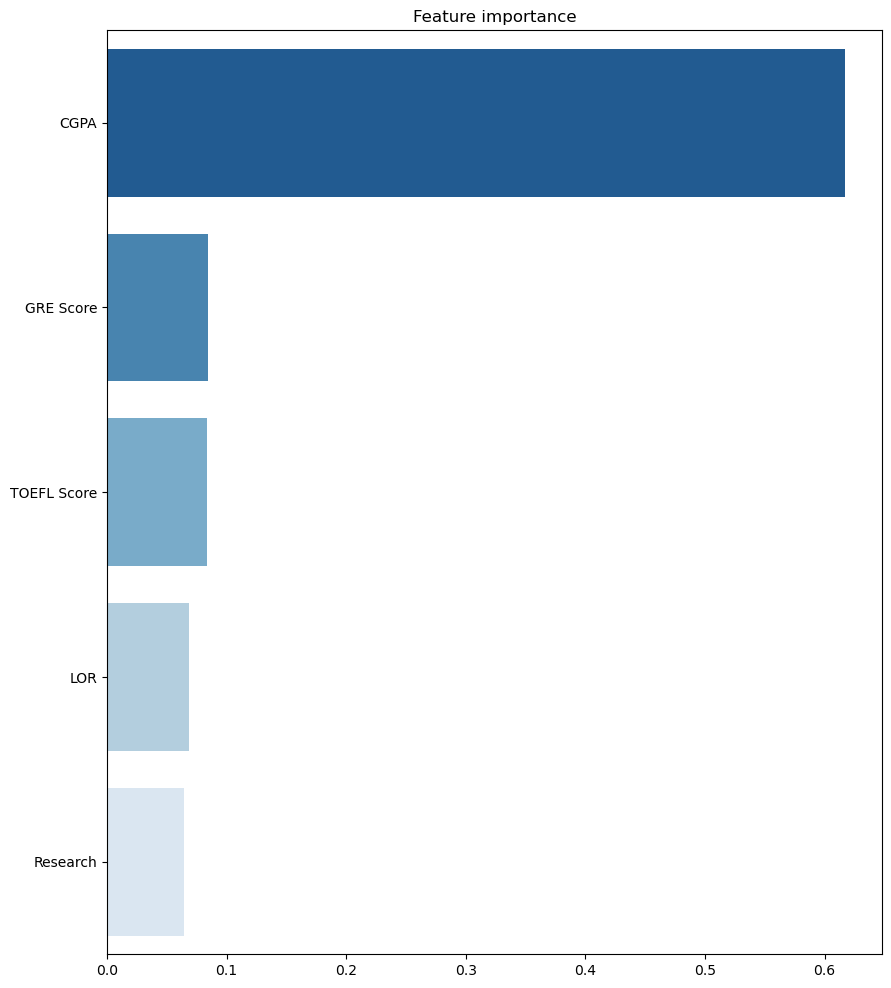

In [47]:
# Plot features importances
imp = pd.Series(data=final_mod.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="Blues_r", orient='h')

# Finished